In [9]:
import pandas as pd
import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates, ticker

In [10]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv("../CSV/result.csv")

In [3]:
data.columns

Index(['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최고기온시각', '최저기온(℃)',
       '최저기온시각', '일교차', '강수량(mm)', '1시간최다강수량(mm)', '1시간최다강수량시각', '평균풍속(m/s)',
       '최대풍속(m/s)', '최대풍속풍향(deg)', '최대풍속시각', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)',
       '최대순간풍속시각', '평균습도(%rh)', '최저습도(%rh)', '평균', '평년', '서울', '부산', '대구',
       '광주', '대전'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점번호           3945 non-null   int64  
 1   지점명            3945 non-null   object 
 2   일시             3945 non-null   object 
 3   평균기온(℃)        3945 non-null   float64
 4   최고기온(℃)        3945 non-null   float64
 5   최고기온시각         3945 non-null   object 
 6   최저기온(℃)        3945 non-null   float64
 7   최저기온시각         3945 non-null   object 
 8   일교차            3945 non-null   float64
 9   강수량(mm)        3945 non-null   float64
 10  1시간최다강수량(mm)   3945 non-null   float64
 11  1시간최다강수량시각     3945 non-null   object 
 12  평균풍속(m/s)      3945 non-null   float64
 13  최대풍속(m/s)      3945 non-null   float64
 14  최대풍속풍향(deg)    3945 non-null   float64
 15  최대풍속시각         3945 non-null   object 
 16  최대순간풍속(m/s)    3945 non-null   float64
 17  최대순간풍속풍향(deg)  3945 non-null   float64
 18  최대순간풍속시각

### 일시 컬럼 데이터 타입 datetime으로 변환

In [5]:
data["일시"] = pd.to_datetime(data["일시"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점번호           3945 non-null   int64         
 1   지점명            3945 non-null   object        
 2   일시             3945 non-null   datetime64[ns]
 3   평균기온(℃)        3945 non-null   float64       
 4   최고기온(℃)        3945 non-null   float64       
 5   최고기온시각         3945 non-null   object        
 6   최저기온(℃)        3945 non-null   float64       
 7   최저기온시각         3945 non-null   object        
 8   일교차            3945 non-null   float64       
 9   강수량(mm)        3945 non-null   float64       
 10  1시간최다강수량(mm)   3945 non-null   float64       
 11  1시간최다강수량시각     3945 non-null   object        
 12  평균풍속(m/s)      3945 non-null   float64       
 13  최대풍속(m/s)      3945 non-null   float64       
 14  최대풍속풍향(deg)    3945 non-null   float64       
 15  최대풍속시각         3945 n

In [55]:
price_2011 = data.loc[data["일시"].dt.year == 2011, ["일시", "평균"]]
price_2011.columns = ["날짜", "가격"]
price_2011["month"] = price_2011["날짜"].dt.month
price_2011["day"] = price_2011["날짜"].dt.day
# price_2011["date"] = price_2011["month"] + "-" + price_2011["day"]
# price_2011["date"] = pd.to_datetime(price_2011["date"])
# price_2011

price_2012 = data.loc[data["일시"].dt.year == 2012, ["일시", "평균"]]
price_2012.columns = ["날짜", "가격"]
price_2012["month"] = price_2012["날짜"].dt.month
price_2012["day"] = price_2012["날짜"].dt.day
# price_2012["date"] = price_2012["month"] + "-" + price_2012["day"]
# price_2012["date"] = pd.to_datetime(price_2012["date"])
# price_2011
# price_2012.info()

In [58]:
price_2011.groupby(price_2011["month"]).mean()

,가격,day
month,,
1,28806.451613,16.0
2,29242.857143,14.5
3,28580.645161,16.0
4,30546.666667,15.5
5,33387.096774,16.0
6,40753.333333,15.5
7,48490.322581,16.0
8,35032.258065,16.0
9,28580.000000,15.5


In [56]:
price_2012.head(3)

,날짜,가격,month,day
365,2012-01-01,30000.0,1,1
366,2012-01-02,30000.0,1,2
367,2012-01-03,30000.0,1,3


<AxesSubplot:xlabel='날짜', ylabel='가격'>

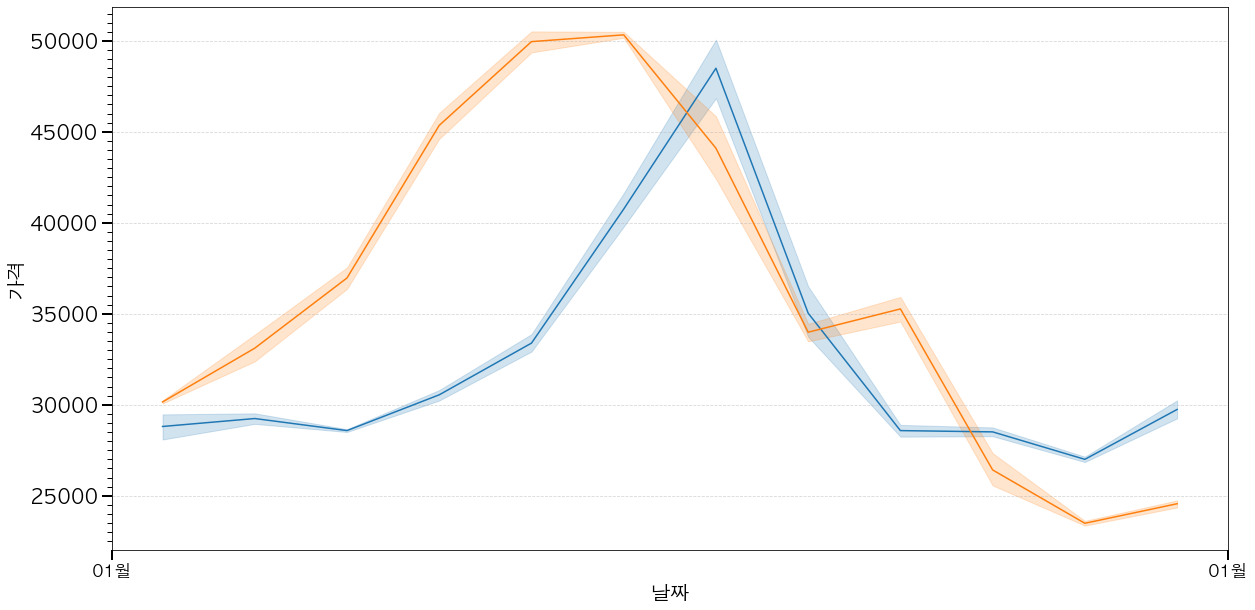

In [45]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(dates.DateFormatter("%m월"))
# ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
ax.yaxis.set_minor_locator(ticker.MultipleLocator(500)) ## y축 서브 눈금 표시

ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
ax.tick_params(axis = "x", which = "major", labelsize = 17)
ax.tick_params(axis = "y", which = "major", labelsize = 20)
ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

plt.xlabel("날짜", fontsize = 20)
plt.ylabel("가격", fontsize = 20)

sns.lineplot(x = "month", y = "가격", data = price_2011)
sns.lineplot(x = "month", y = "가격", data = price_2012)

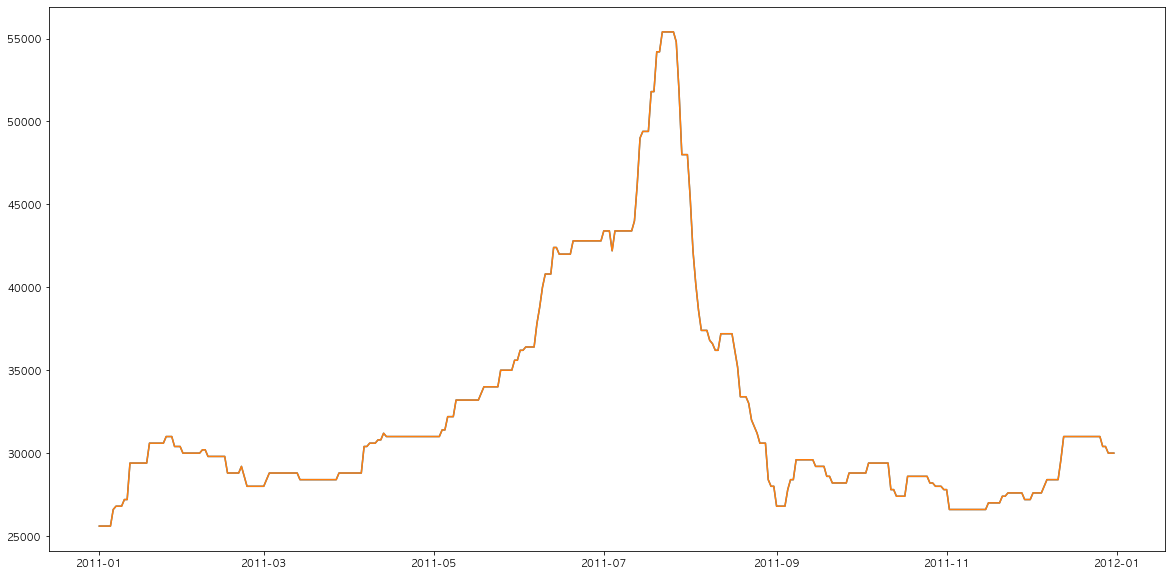

In [36]:
plt.plot(price_2011["날짜"], price_2011["가격"])
plt.plot(price_2011["날짜"], price_2011["가격"])